<a href="https://colab.research.google.com/github/Randhir123/quant/blob/main/TRANSFORMING_TIME_SERIES_INTO_IMAGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRANSFORMING TIME SERIES INTO IMAGES**

## **1. INTRODUCTION**

The use of Convolutional Neural Networks has become the state-of-the-art approach in various image recognition, computer vision, and speech recognition tasks. This is due to their success in tackling complex problems thanks to their ability to extract relevant information from image-like data structures from certain location-invariance assumptions and weight sharing (See Module 2 of this course).

In the next two modules of this course, we will describe the main Deep Learning models that are used in time series prediction problems (Recurrent Neural Networks among other architectures). But before describing those concepts, it is worth mentioning that there are useful methodologies that allow us to transform time series information into images. Those image versions of time series can then be used as inputs to CNNs that allow us to predict the labels associated to each time series.

Transforming time series into images may turn out to be more effective than resorting to Deep Learning time series models due to two reasons. First, CNNs usually have better behavior while training. Second, we can exploit complex pre-trained CNN architectures, which are not readily available for explicit time series architectures.

In this notebook, we implement the Gramian Angular Field (GAF) methodology that we described in Lesson 3, and illustrate its outcome for a general financial time series. In the previous Lesson, we showed a straightforward coding implementation in Python for GAF. In this notebook, we are going to make use of the "pyts" library, which we load below and that includes a readily available class that performs the GAF transformation.

In [27]:
!pip install pyts

In [28]:
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

First, we show for a sample open-source dataset, [GunPoint](http://timeseriesclassification.com/description.php?Dataset=GunPoint), how GAF makes the transformations of time series. The information of this dataset, created for computer vision tasks, provides information about the location of an actor's hands in a sequence where the actor draws a gun (or pretends to draw a gun). The images are represented from a side view. Please, follow the previous link if you are further interested in learning about this dataset.

When we load the dataset, we obtain an two-dimensional array where, out of the 50 rows, each row contains information of a time series with 150 observations. Each time series is "contiguous" to each other, by shifting one time period the observations of the previous sequence. This means that the second row contains the same time series than the first row, except for the first and last observations. The first observation in the second row is the second observation of the first row, the second observation in the second row is the third observation of the first row and so on...

Formally, consider a time series with realizations $\{x_1, x_2,...,x_K\}$. We can split the time series into sequences of $T$ observations $\{x_t, x_{t+1}, x_{t+2},...,x_{t+T}\}$, for $t\in[1,K-T]$. Then, we form the array $X$ that stacks each of these sequences:

$$
X = \begin{pmatrix}
    x_1 & x_2 & \cdots & x_T \\
    x_2 & x_3 & \cdots & x_{T+1} \\
    x_3 & x_4 & \cdots & x_{T+2} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{K-T} & x_{K-T+1} & \cdots & x_{K}  
    \end{pmatrix}
$$

In [29]:
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)
# Check the shape of the array
print(X.shape)
# Print the first 10 observations of the first two rows
# Check that both sequences are contiguous to each other
print(X[0, 0:10])
print(X[0, 1:11])

(50, 150)
[-0.6478854  -0.64199155 -0.63818632 -0.63825875 -0.63834515 -0.63869741
 -0.64304876 -0.64376789 -0.64504991 -0.64711823]
[-0.64199155 -0.63818632 -0.63825875 -0.63834515 -0.63869741 -0.64304876
 -0.64376789 -0.64504991 -0.64711823 -0.64915334]


Now we transform each time series using the Gramian Angular Field. Recall that the transformation involves, first, a Min-Max transformation of each time series that rescales the information to the [-1,1] interval. Second, we compute the polar coordinates, importantly the term $\phi_t=\arccos{(\widetilde{x}_t)}$, for each observation of the scaled time series. Finally, we build the Gram-like matrix, for each time series:

$$
    G = \begin{pmatrix}
           \cos{(\phi_1 + \phi_1)} & \cos{(\phi_1 + \phi_2)} &  \cdots & \cos{(\phi_1 + \phi_T)}  \\
           \cos{(\phi_2 + \phi_1)} & \cos{(\phi_2 + \phi_2)} &  \cdots & \cos{(\phi_2 + \phi_T)} \\
           \vdots & \vdots & \ddots & \vdots \\
           \cos{(\phi_T + \phi_1)} & \cos{(\phi_T + \phi_2)} &  \cdots & \cos{(\phi_T + \phi_T)} \\
        \end{pmatrix}
$$

(150, 150)
(150, 150)


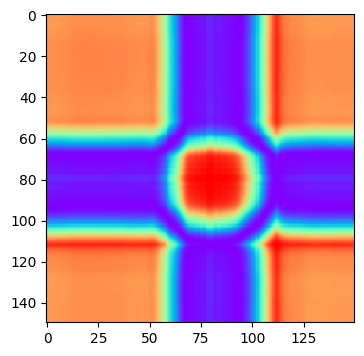

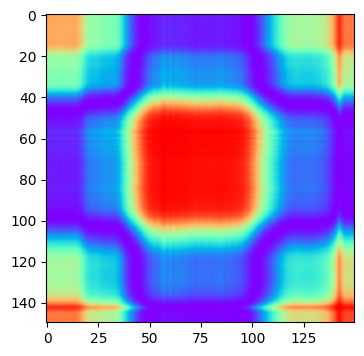

In [30]:
transformer = GramianAngularField()
X_new = transformer.transform(X)
# Show the results for the first time series
plt.figure(figsize=(4, 4))
plt.imshow(X_new[0], cmap="rainbow")
print(X_new[0].shape)
# Show the results for the 10th time series
plt.figure(figsize=(4, 4))
plt.imshow(X_new[9], cmap="rainbow")
print(X_new[9].shape)

The image version of the dataset can then be used to train a convolutional neural network designed to learn from an image if a person, from a side view, is drawing a gun or not.

## **3. GAF FOR A FINANCIAL TIME SERIES**

Now, let's perform the same task for a financial time series. We are going to use daily information about the close price of the ETF QQQ that tracks the Nasdaq index. We use more than 20 years of information.

In [68]:
import numpy as np
import yfinance as yf

df = yf.download("QQQ", start="1980-01-01", end="2022-04-11")
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,362.709991,369.309998,362.440002,369.299988,364.051453,45950200
2022-04-05,367.809998,368.540009,359.929993,361.100006,355.968048,62738700
2022-04-06,355.649994,356.779999,350.559998,353.260010,348.239502,90077100
2022-04-07,352.239990,356.350006,348.690002,354.100006,349.067596,63777400
2022-04-08,352.320007,353.089996,348.500000,349.149994,344.187866,61956100


(5811,)


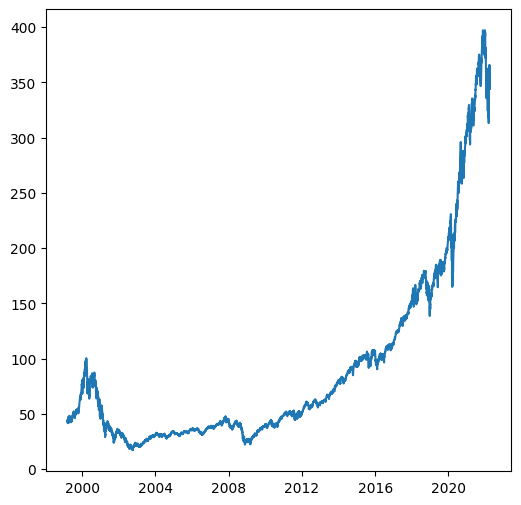

In [32]:
Xdf = df.iloc[:, 4]
print(Xdf.shape)
plt.figure(figsize=(6, 6))
plt.plot(Xdf)

We now build the $X$ matrix that we defined above for the new data, by stacking time series of 30 observations. We illustrate in the figure below how $X$ represents information about 5,781 time series of 30 observations on overlapping intervals as we described above.

(5781, 30)


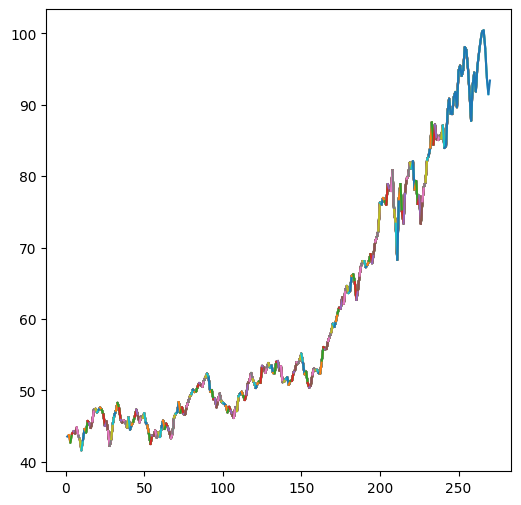

In [69]:
X_train = []
window_size = 30
for i in range(window_size, Xdf.shape[0]):
    X_train.append(Xdf[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(6, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

We then apply the GAF transformation and illustrate the outcomes for some observations. Notice how the transformation gives values close to zero to those observations that are close to the average of the time series, while it gives high values to those realizations that are relatively more "extreme" within each time series.

We now have a sample of 5,781 images, to which we can attach a label, say, whether the price went up or down over the following days, and train a Convolutional Neural Network using the procedures we described in Module 2 and and the first two lessons of Module 3.

In [70]:
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(5781, 30, 30)


(30, 30)


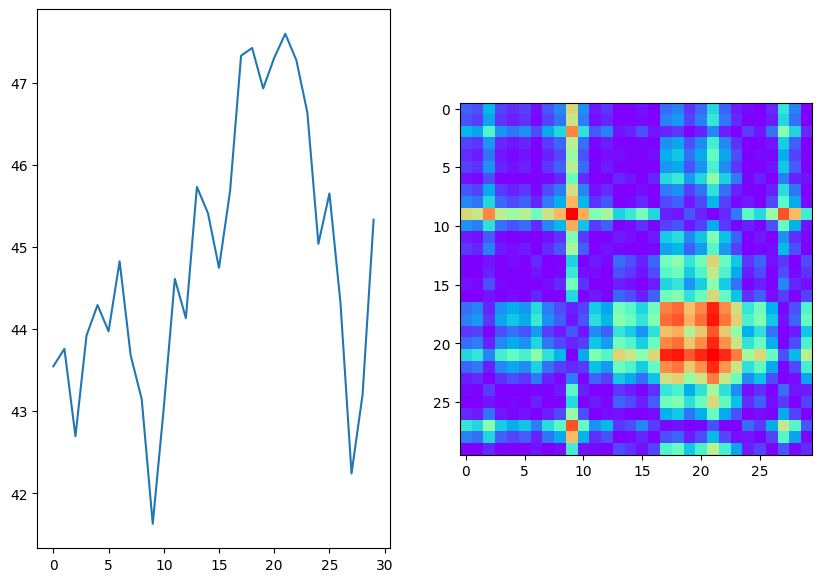

In [71]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

(30, 30)


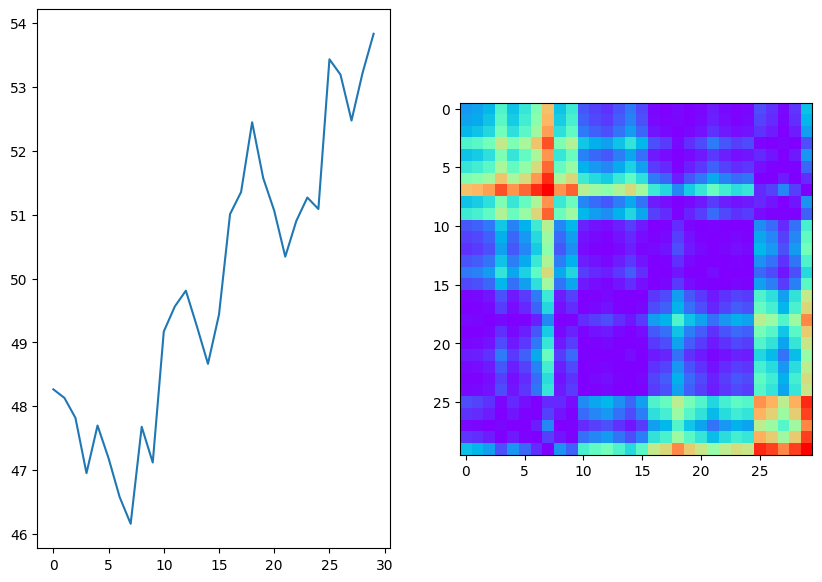

In [72]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

## **3. USING THE TRANSFORMED SERIES IN A CNN**

In the blocks of code below, we design a convolutional neural network to predict the evolution of the time series. By now, you should be familiar with this type of structure, so we leave the analysis of the network architecture and its performance to your own judgement.

In [73]:
import tensorflow as tf

In [74]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdf.shape[0] - window_size):
    y_data.append(Xdf[i] < Xdf[i + window_size])
y_data = np.array(y_data)
y_data.shape

(5751,)

In [81]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255.0
X_data.shape

(5751, 30, 30)

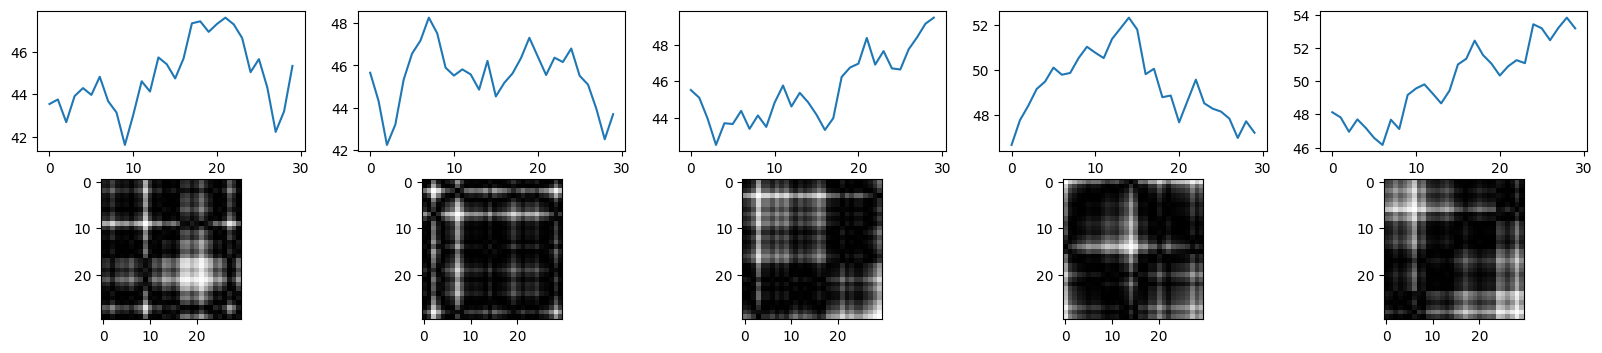

In [76]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

In [82]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [78]:
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(16, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [79]:
model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.h5", monitor="val_accuracy", save_best_only=True, mode="auto"
)
class_weight = {0: 1 / (1 - np.mean(y_data_train)), 1: 1.0}
print(class_weight)

{0: 2.616609783845279, 1: 1.0}


In [83]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=50,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
    callbacks=[checkpoint],
    class_weight=class_weight,
)

TypeError: Value passed to parameter 'x' has DataType bool not in list of allowed values: bfloat16, float16, float32, float64, int8, int16, int32, int64, complex64, complex128

In [ ]:
model = tf.keras.models.load_model("model.h5")
acc = model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_prob = model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="Blues")
print(classification_report(y_data_test, y_pred))

## **4. CONCLUSIONS**

In this lesson, we have described the implementation of the GAF transformation to obtain images from time series information. This type of methodology may be effective to enhance our prediction tasks from time series models. Convolutional neural networks have been successful at performing challenging image recognition tasks due to their ability to extract relevant features from images. Thus, it may then be convenient to take advantage of this powerful tool, even when our data is not shown in the form of an image.

## **TESTS**

Below we show the simple implementation of the GAF algorithm in a few lines of code and compare the results with the class included in the pyts library.

[-0.6     1.      0.744   0.088  -1.      0.5328  0.712   0.984 ]
[2.21429744 0.         0.73175934 1.48268235 3.14159265 1.00889045
 0.77845394 0.17912481]
[[-0.28       -0.6        -0.98094369 -0.84969638  0.6        -0.99667296
  -0.98894357 -0.73293477]
 [-0.6         1.          0.744       0.088      -1.          0.5328
   0.712       0.984     ]
 [-0.98094369  0.744       0.107072   -0.6001154  -0.744      -0.16903792
   0.06054599  0.61304747]
 [-0.84969638  0.088      -0.6001154  -0.984512   -0.088      -0.79607178
  -0.63679934 -0.09088525]
 [ 0.6        -1.         -0.744      -0.088       1.         -0.5328
  -0.712      -0.984     ]
 [-0.99667296  0.5328     -0.16903792 -0.79607178 -0.5328     -0.43224832
  -0.21485959  0.37350171]
 [-0.98894357  0.712       0.06054599 -0.63679934 -0.712      -0.21485959
   0.013888    0.57550177]
 [-0.73293477  0.984       0.61304747 -0.09088525 -0.984       0.37350171
   0.57550177  0.936512  ]]


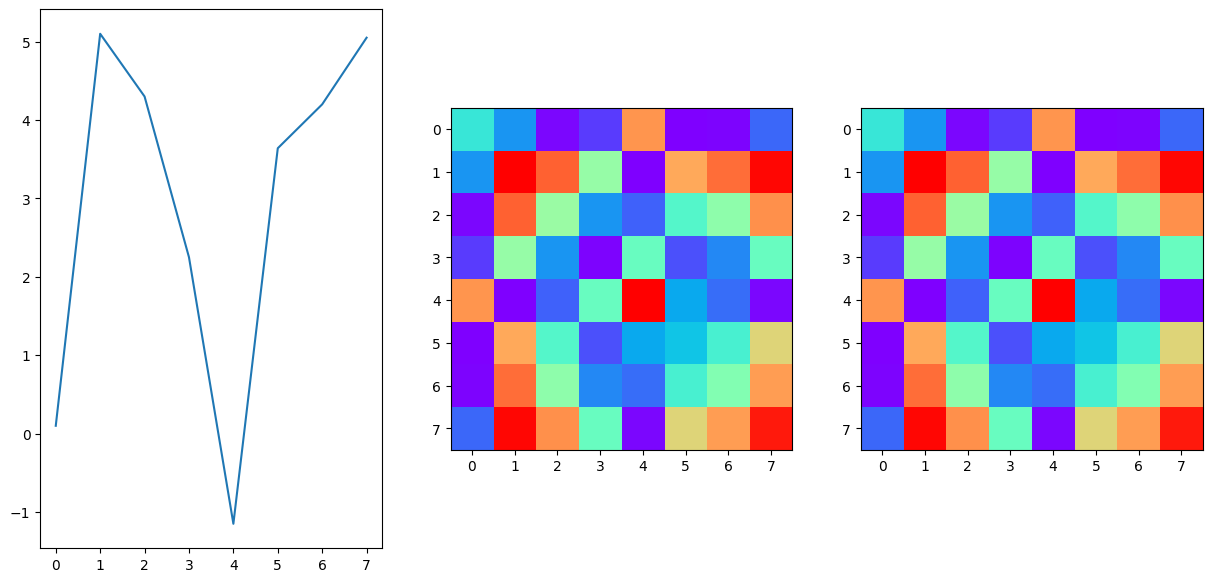

In [84]:
XX = np.array([0.1, 5.1, 4.3, 2.25, -1.15, 3.64, 4.2, 5.05])  # X_train[99,:] #
# Manual transformation
XX_norm = (XX - np.min(XX)) / (np.max(XX) - np.min(XX))
XX_norm = XX_norm * 2 - 1
print(XX_norm)
XX_arccos = np.arccos(XX_norm)
print(XX_arccos)
XX_arccos_m = np.add.outer(XX_arccos, XX_arccos)
GramAngular = np.cos(XX_arccos_m)
print(GramAngular)
# Using the library
GramAngular_pyts = transformer.transform(XX.reshape(1, -1))
# Show the results, compare the "from scratch" method with the pyts method
fig, ax = plt.subplots(1, 3, figsize=(15, 7), gridspec_kw={"width_ratios": [1, 1, 1]})
ax[0].plot(XX)
ax[1].imshow(GramAngular, cmap="rainbow")
ax[2].imshow(GramAngular_pyts[0], cmap="rainbow")